In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step
Confusion Matrix:
[[123   0  29  20]
 [  0   0   4  11]
 [  1   0 600  33]
 [ 12   0  89 358]]


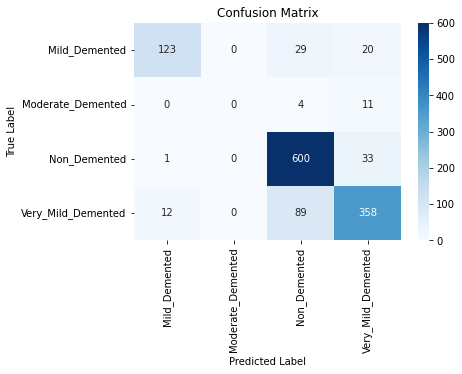

In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

# Directory path for the test data
test_dir = r'G:\Major Project\MRI\Folder2\Alzheimer MRI Disease Classification Dataset\Preprocessed\test'

# Class labels and corresponding folders
class_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
class_map = {label: idx for idx, label in enumerate(class_labels)}

# Load the model
model = tf.keras.models.load_model(r'G:\Major Project\MRI\Folder2\Alzheimer MRI Disease Classification Dataset\model.h5')

# Initialize lists to store image data and labels
X_test = []
y_test = []

# Loop through each class folder and load the images
for label in class_labels:
    folder_path = os.path.join(test_dir, label)
    
    # Loop through each image in the folder
    for image_name in os.listdir(folder_path):
        # Build the image path
        image_path = os.path.join(folder_path, image_name)
        
        # Load and preprocess the image as grayscale (1 channel)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale (1 channel)
        
        # Convert the grayscale image to 3 channels (RGB) by duplicating the channel
        img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Convert to 3-channel RGB
        
        # Add the image to the test data list
        X_test.append(img_rgb)
        # Append the corresponding label to y_test
        y_test.append(class_map[label])

# Convert X_test and y_test to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Predict the class labels for the test images
y_pred_prob = model.predict(X_test)  # Get the probabilities for each class
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
